<a href="https://colab.research.google.com/github/sophiebarber/Machine_learning/blob/main/Exercise_2_Group_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2 - Classification

In this exercise you will use scikit-learn, a popular machine learning package in python to train and tune a classifier. A particularly useful feature is that all classifiers (and linear models) are called using the same API, so it is easy to test between different models (see the sklearn-intro notebook for examples). So in this exercise we will a classification technique (logistic regression) that is representative of methods and challenges you will encounter when using any classification method.


## Dataset 1
The dataset you will be using is default of credit card clients Data Set.
There are two data files: "CreditDefault_training.csv" and "CreditDefault_Xtest.csv"
Both files have the following fields, except the label ("default.payment.next.month") which is not available in "CreditDefault_Xtest.csv"

Features:

1 - LIMIT_BAL:  Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. <br>
2 - SEX: (1 = male; 2 = female) <br>
3- EDUCATION: (six levels: 1,2,3,4,5,6) <br>
4 - MARRIAGE: (1 = married; 2 = single; 3 = others) <br>
5 - AGE <br>

From "PAY_1" to "PAY_6": History of past payment (Repayment status: -2: Balance paid in full and no transactions this period; -1: Balance paid in full, but account has a positive balance at end of period due to recent transactions for which payment has not yet come due; 0: Customer paid the minimum due amount, but not the entire balance; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.)<br>
6 - PAY_1: the repayment status in September, 2005 <br>
7 - PAY_2: the repayment status in August, 2005 <br>
...<br>
11 - PAY_6: the repayment status in April, 2005 <br>

From "BILL_AMT1" to "BILL_AMT6": Amount of bill statement (NT dollar).<br>
12 - BILL_AMT1 : amount of bill statement in September, 2005<br>
13 - BILL_AMT2 : amount of bill statement in August, 2005<br>
...<br>
17 - BILL_AMT6 : amount of bill statement in April, 2005<br>

From "PAY_AMT1" to "PAY_AMT6": Amount of previous payment (NT dollar).<br>
18 - PAY_AMT1 : amount paid in September, 2005<br>
19 - PAY_AMT2 : amount paid in August, 2005<br>
...<br>
23 - PAY_AMT6 : amount paid in April, 2005<br>

Target:

default.payment.next.month: binary variable, whether default payment (Yes = 1, No = 0)


Training dataset, "CreditDefault_training.csv", contains 3985 rows and 24 columns. This is the training set containing both of the features and the target.
Test dataset, "CreditDefault_Xtest.csv", contains 1000 rows and 23 columns. This is the test set which only contains the features.

Prediction task is to determine whether there's credit default for a person.



In [ ]:
## Mishika

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import io

In [ ]:
# Load your training data set
uploaded = files.upload()

Saving CreditDefault_training.csv to CreditDefault_training (3).csv
Saving CreditDefault_Xtest.csv to CreditDefault_Xtest (3).csv


In [ ]:
# Split training data into X and y
df_train = pd.read_csv(io.BytesIO(uploaded['CreditDefault_training (3).csv']))
df_test = pd.read_csv(io.BytesIO(uploaded['CreditDefault_Xtest (3).csv']))


## Standardization and One-hot Encoding

Standardize the continuous features and convert categorical variables ('SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6') into dummy variables.<br>
Note the situation where not all repayment status categories (-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9) necessarily appear in the training dataset for variables 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'.

Standardization and one-hot encoding for training set and test set

In [ ]:
#standardization of continuous variables of the training set
from sklearn.preprocessing import StandardScaler

# Selecting the continuous variables
stand_cont_train = df_train[['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

# Applying StandardScaler
scaler = StandardScaler()
cont_scaled_train = scaler.fit_transform(stand_cont_train)

# Convert to DataFrame
cont_scaled_df_train = pd.DataFrame(cont_scaled_train, columns=stand_cont_train.columns)

# Display the first few rows of the scaled dataframe
print(cont_scaled_df_train.head())

   LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0  -0.902690 -1.237370  -0.659401  -0.657623  -0.653395  -0.558590  -0.564919   
1  -0.751263 -1.237370   0.123571   0.174192   0.222944   0.299113   0.397532   
2   1.898720  0.816144  -0.573530  -0.484216  -0.572498  -0.613365  -0.597173   
3  -1.054118  1.896941  -0.680080  -0.679090  -0.618263  -0.598931  -0.584702   
4  -0.902690  1.464622  -0.427412  -0.411319  -0.357541  -0.331676  -0.296197   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0  -0.630095 -0.264370 -0.244519  0.071315 -0.262679 -0.267721  1.270320  
1   0.500862 -0.175510 -0.171175 -0.178872 -0.109918  0.049149 -0.300705  
2  -0.540866  0.526037  0.097548 -0.157124 -0.108494  0.057642  1.564334  
3  -0.635727 -0.362190 -0.116218 -0.332890 -0.268056 -0.288256 -0.300705  
4  -0.272334 -0.299963 -0.154688 -0.332890 -0.215343 -0.230083 -0.242460  


In [ ]:
#standardization of continuous variables of the test set
from sklearn.preprocessing import StandardScaler

# Selecting the continuous variables
stand_cont_test = df_test[['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

# Applying StandardScaler
scaler = StandardScaler()
cont_scaled_test = scaler.fit_transform(stand_cont_test)

# Convert to DataFrame
cont_scaled_df_test = pd.DataFrame(cont_scaled_test, columns=stand_cont_test.columns)

# Display the first few rows of the scaled dataframe
print(cont_scaled_df_test.head())

   LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0  -0.630510  0.620300   1.634425   1.512066   1.351052  -0.369743  -0.607774   
1  -0.863285 -0.044189  -0.029025  -0.424391  -0.422265  -0.382195  -0.355548   
2  -0.630510  0.731049  -0.452793  -0.420992  -0.387009  -0.345811  -0.307403   
3  -0.009777 -0.930174   0.713256   0.435431   0.536011  -0.034137   0.033896   
4  -1.018468 -0.597929  -0.571248  -0.515319  -0.477150  -0.414975  -0.375876   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0  -0.444210 -0.082065 -0.172661 -0.223336 -0.114938  0.421282 -0.196015  
1  -0.330376 -0.279571  0.078449 -0.233273 -0.258322 -0.285271 -0.247379  
2  -0.293458 -0.277090 -0.295516 -0.233030 -0.258322 -0.328137 -0.183797  
3  -0.646624 -0.135306 -0.160510 -0.189408 -0.195212 -0.328137 -0.277784  
4  -0.308253 -0.177841 -0.275265 -0.174867 -0.258322 -0.137056 -0.230790  


In [ ]:
# one-hot encoding of categorical variables of the training data set
from sklearn.preprocessing import OneHotEncoder

cat_data_train = df_train[['SEX', 'EDUCATION', 'MARRIAGE']]

# Applying OneHotEncoder
encoder = OneHotEncoder(sparse=False)
categorical_encoded_train_1 = encoder.fit_transform(cat_data_train)
categorical_encoded_df_train_1 = pd.DataFrame(categorical_encoded_train_1, columns=encoder.get_feature_names_out(cat_data_train.columns))

# Encoding the other categorical variables from 'PAY_1' to 'PAY_6'

# Creating a numpy array with all possible values of PAY columns
cat = np.array([-2,-1,0,1,2,3,4,5,6,7,8,9])
a_cat = []

 #Creating a list of 6 numpy arrays that represent each PAY column containing all the possible values
for i in range(0,6):
  a_cat.append(cat)


cat_data_train_2 = df_train[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
#Encoding the training set for PAY_1 to PAY_6 variables
encoder_1 = OneHotEncoder(sparse = False, categories= a_cat)
categorical_encoded_train_2 = encoder_1.fit_transform(cat_data_train_2)
categorical_encoded_df_train_2 = pd.DataFrame(categorical_encoded_train_2, columns=encoder_1.get_feature_names_out(cat_data_train_2.columns))


categorical_encoded_df_train = pd.concat([categorical_encoded_df_train_1,categorical_encoded_df_train_2], axis =1)
print(categorical_encoded_df_train.head())


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


   SEX_1  SEX_2  EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
0    0.0    1.0          0.0          1.0          0.0          0.0   
1    0.0    1.0          0.0          1.0          0.0          0.0   
2    1.0    0.0          1.0          0.0          0.0          0.0   
3    1.0    0.0          0.0          1.0          0.0          0.0   
4    0.0    1.0          0.0          1.0          0.0          0.0   

   EDUCATION_5  EDUCATION_6  MARRIAGE_1  MARRIAGE_2  ...  PAY_6_0  PAY_6_1  \
0          0.0          0.0         0.0         1.0  ...      0.0      0.0   
1          0.0          0.0         0.0         1.0  ...      1.0      0.0   
2          0.0          0.0         1.0         0.0  ...      0.0      0.0   
3          0.0          0.0         0.0         0.0  ...      1.0      0.0   
4          0.0          0.0         1.0         0.0  ...      1.0      0.0   

   PAY_6_2  PAY_6_3  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  PAY_6_9  
0      0.0      0.0      0.0

In [ ]:
# one-hot encoding of categorical variables of the test data set
from sklearn.preprocessing import OneHotEncoder

cat_data_test = df_test[['SEX', 'EDUCATION', 'MARRIAGE']]

# Applying OneHotEncoder
encoder = OneHotEncoder(sparse=False)
categorical_encoded_test_1 = encoder.fit_transform(cat_data_test)
categorical_encoded_df_test_1 = pd.DataFrame(categorical_encoded_test_1, columns=encoder.get_feature_names_out(cat_data_test.columns))

# Encoding the other categorical variables from 'PAY_1' to 'PAY_6'

# Creating a numpy array with all possible values of PAY columns
cat = np.array([-2,-1,0,1,2,3,4,5,6,7,8,9])
a_cat = []

 #Creating a list of 6 numpy arrays that represent each PAY column containing all the possible values
for i in range(0,6):
  a_cat.append(cat)


cat_data_test_2 = df_test[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
#Encoding the training set for PAY_1 to PAY_6 variables
categorical_encoded_test_2 = encoder_1.transform(cat_data_test_2)
categorical_encoded_df_test_2 = pd.DataFrame(categorical_encoded_test_2, columns=encoder_1.get_feature_names_out(cat_data_test_2.columns))

categorical_encoded_df_test = pd.concat([categorical_encoded_df_test_1,categorical_encoded_df_test_2], axis =1)
print(categorical_encoded_df_test.head())


   SEX_1  SEX_2  EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
0    1.0    0.0          0.0          0.0          0.0          0.0   
1    1.0    0.0          1.0          0.0          0.0          0.0   
2    0.0    1.0          1.0          0.0          0.0          0.0   
3    0.0    1.0          0.0          1.0          0.0          0.0   
4    1.0    0.0          1.0          0.0          0.0          0.0   

   EDUCATION_5  EDUCATION_6  MARRIAGE_1  MARRIAGE_2  ...  PAY_6_0  PAY_6_1  \
0          0.0          1.0         1.0         0.0  ...      0.0      0.0   
1          0.0          0.0         0.0         1.0  ...      1.0      0.0   
2          0.0          0.0         1.0         0.0  ...      0.0      0.0   
3          0.0          0.0         0.0         1.0  ...      1.0      0.0   
4          0.0          0.0         1.0         0.0  ...      1.0      0.0   

   PAY_6_2  PAY_6_3  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  PAY_6_9  
0      0.0      0.0      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Resetting index to align the dataframes before combining
categorical_encoded_df_train.reset_index(drop=True, inplace=True) # training set
cont_scaled_df_train.reset_index(drop=True, inplace=True) # training set

categorical_encoded_df_test.reset_index(drop=True, inplace=True) # test set
cont_scaled_df_test.reset_index(drop=True, inplace=True) # test set

# Combining encoded categorical data and scaled numerical data of the training set
combined_df_train = pd.concat([cont_scaled_df_train,categorical_encoded_df_train, df_train['default.payment.next.month']], axis=1)

# Combining encoded categorical data and scaled numerical data of the test set
combined_df_test= pd.concat([cont_scaled_df_test,categorical_encoded_df_test], axis=1)

# Display the first few rows of the combined dataframe
print(combined_df_train.head())
print(combined_df_test.head())

   LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0  -0.902690 -1.237370  -0.659401  -0.657623  -0.653395  -0.558590  -0.564919   
1  -0.751263 -1.237370   0.123571   0.174192   0.222944   0.299113   0.397532   
2   1.898720  0.816144  -0.573530  -0.484216  -0.572498  -0.613365  -0.597173   
3  -1.054118  1.896941  -0.680080  -0.679090  -0.618263  -0.598931  -0.584702   
4  -0.902690  1.464622  -0.427412  -0.411319  -0.357541  -0.331676  -0.296197   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_6_1  PAY_6_2  PAY_6_3  PAY_6_4  \
0  -0.630095 -0.264370 -0.244519  ...      0.0      0.0      0.0      0.0   
1   0.500862 -0.175510 -0.171175  ...      0.0      0.0      0.0      0.0   
2  -0.540866  0.526037  0.097548  ...      0.0      0.0      0.0      0.0   
3  -0.635727 -0.362190 -0.116218  ...      0.0      0.0      0.0      0.0   
4  -0.272334 -0.299963 -0.154688  ...      0.0      0.0      0.0      0.0   

   PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  PAY_6_9  de

**Splitting training data into training and validation set (70:30 ratio) (the code has been provided)**

In [ ]:
# Our combined DataFrame after preprocessing is named combined_df_train
# And the target variable is ''default.payment.next.month'

# Separating the features and the target variable

X =   combined_df_train.drop(['default.payment.next.month'], axis ='columns')
y =   combined_df_train['default.payment.next.month']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

Print the shape of X_train, y_train, X_val

In [ ]:
print(f'Shape of X_train is {X_train.shape}')
print(f'Shape of y_train is {y_train.shape}')
print(f'Shape of X_val is {X_val.shape}')

Shape of X_train is (2789, 97)
Shape of y_train is (2789,)
Shape of X_val is (1196, 97)


## Logistic Regression

As previously mentioned, the scikit-learn classification API makes it easy to train a classifier.


Use LogisticRegression from sklearn.linear_model to make a logistic regression classifier.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# First, initialize the classifier with default parameters
# then fit the classifier on training data and labels

### WRITE CODE HERE ###
log_class = LogisticRegression()
log_class.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# If there is any ConvergenceWarning, increase the number of iterations. (Let max_iter = 200)
### WRITE CODE HERE ###
log_class = LogisticRegression(max_iter= 200)
log_class.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
# predict the output for validation dataset
### WRITE CODE HERE
y_preds = log_class.predict(X_val)
y_preds

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
y_preds.shape

(1196,)

Implement my_precision(), my_recall(), my_accuracy() by yourselves

In [ ]:
## defining the new functions

def my_accuracy(y, y_preds): #(TP+TN)/(TP+FP+FN+TN)
  fp = np.sum((y_preds == 1) & (y == 0))
  tp = np.sum((y_preds == 1) & (y == 1))
  fn = np.sum((y_preds == 0) & (y == 1))
  tn = np.sum((y_preds == 0) & (y == 0))
  accuracy = (tp+tn) / (tp+ tn+fp+fn)
  return accuracy



def my_precision(y, y_preds): #TP/(TP+FP)
  fp = np.sum((y_preds == 1) & (y == 0))
  tp = np.sum((y_preds == 1) & (y == 1))
  fn = np.sum((y_preds == 0) & (y == 1))
  tn = np.sum((y_preds == 0) & (y == 0))
  precision = tp / (tp+fp)
  return precision


def my_recall(y, y_preds): #TP/(TP+FN)
  fp = np.sum((y_preds == 1) & (y == 0))
  tp = np.sum((y_preds == 1) & (y == 1))
  fn = np.sum((y_preds == 0) & (y == 1))
  tn = np.sum((y_preds == 0) & (y == 0))
  recall= tp / (tp+fn)
  return recall




Use your above functions to compute precision, recall, and accuracy of your model on validation set:

In [ ]:
## printing the three scores

print(f'Accuracy is: {my_accuracy(y_val,y_preds)}')
print(f'Precision is: {my_precision(y_val, y_preds)}')
print(f'Recall is: {my_recall(y_val, y_preds)}')

Accuracy is: 0.8219063545150501
Precision is: 0.6610169491525424
Recall is: 0.43333333333333335


In [ ]:
### Validating the three scores using the sklearn metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_val, y_preds)

0.8219063545150501

In [ ]:
precision_score(y_val, y_preds)

0.6610169491525424

In [ ]:
recall_score(y_val, y_preds)

0.43333333333333335

Thus, we see that the three functions are well defined and give is the same results for Accuracy, Precision and Recall as the sklearn metrics and they are: <br>
Q. Accuracy<br>
Ans - 0.8219063545150501

Q. Precision<br>
Ans - 0.6610169491525424

Q. Recall<br>
Ans - 0.43333333333333335

Q. Which metric (accuracy, precision, recall) is more appropriate and in what cases? Will there be scenarios where it is better to use precision than accuracy? Explain. <br>
Ans -  

- Accuracy measures the percentage of correct predictions made by model. It is particlarly effective in in scenarios when the classes are balanced. Else, it gives a biased view of the model performance.<br>
- Precision measures the accuracy of the positive predictions. It is particularly important in scenarios where the cost of a false positive is high. <br>
- Recall on the other hand is also known as Sensitivity and it measures the ability of the model to identify all relevant instances. It is especially crucial in cases where missing a positive instance is costly.

It is better to use precision than accuracy in situations where we have unbalances classes as a result of which Accuracy will not truly represent the predictive performance of the model. Furthemore, there is also a trade off that is see between precision and recall and either of the two measures are chosen depending on the scenario. For instance, in case of loan default(where missing a default activity is costly), recall might be prioritized and it is better we have a high recall as the banks don’t want to lose money and it would be a good idea to alarm the bank even if there is a slight doubt about defaulter. In contrast, in precision machinery manufacturing, precision would be more critical.

Q. Which metric is suitable in this case? <br>
Ans - As mentioned above, in the case of detecting a default on the loan, missing a default activity on the loan is costy thus the recall metric is more suited for this case.

In [ ]:
## Cecilia

### ROC curve

Use roc_Curve from sklearn.metrics and use matplotlib.pyplot to plot the ROC curve. Use validation set to make predictions and to draw ROC curve.

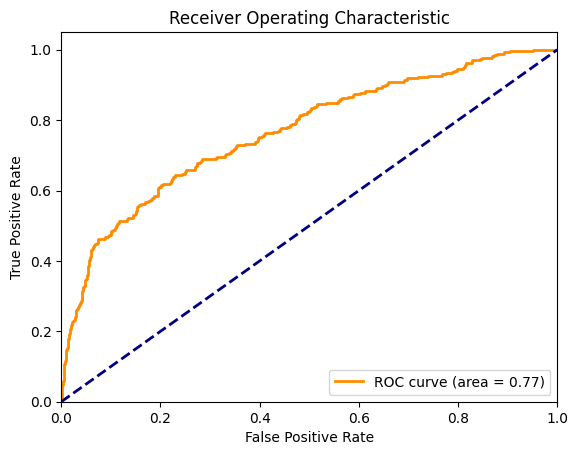

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# Predict probabilities
y_probs = log_class.predict_proba(X_val)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_val, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Q. What is the AUC obtained?<br>
Ans - 0.77

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data, which is separate from "fitting" or "training" the model.


Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l1'. Make predictions on validation set and compute accuracy, precision and recall.

In [ ]:
### WRITE CODE HERE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the logistic regression classifier
classifier1 = LogisticRegression(penalty = 'l1', C = 0.1, solver = 'liblinear')

log_hyper1 = classifier1.fit(X_train, y_train)

y_preds1 = log_hyper1.predict(X_val)

print(f'Accuracy is: {my_accuracy(y_val,y_preds1)}')
print(f'Precision is: {my_precision(y_val, y_preds1)}')
print(f'Recall is: {my_recall(y_val, y_preds1)}')

Accuracy is: 0.8252508361204013
Precision is: 0.6804733727810651
Recall is: 0.42592592592592593


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l1'. Make predictions on validation set and compute accuracy, precision and recall.

In [ ]:
### WRITE CODE HERE
# Define the logistic regression classifier
classifier2 = LogisticRegression(penalty = 'l1', C = 0.5, solver = 'liblinear')

log_hyper2 = classifier2.fit(X_train, y_train)

y_preds2 = log_hyper2.predict(X_val)

print(f'Accuracy is: {my_accuracy(y_val,y_preds2)}')
print(f'Precision is: {my_precision(y_val, y_preds2)}')
print(f'Recall is: {my_recall(y_val, y_preds2)}')

Accuracy is: 0.8235785953177257
Precision is: 0.6685714285714286
Recall is: 0.43333333333333335


Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l2'. Make predictions on validation set and compute accuracy, precision and recall.

In [ ]:
### WRITE CODE HERE
# Define the logistic regression classifier
classifier3 = LogisticRegression(penalty = 'l2', C = 0.1, solver = 'liblinear')

log_hyper3 = classifier3.fit(X_train, y_train)

y_preds3 = log_hyper3.predict(X_val)

print(f'Accuracy is: {my_accuracy(y_val,y_preds3)}')
print(f'Precision is: {my_precision(y_val, y_preds3)}')
print(f'Recall is: {my_recall(y_val, y_preds3)}')

Accuracy is: 0.8210702341137124
Precision is: 0.6627906976744186
Recall is: 0.4222222222222222


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l2'. Make predictions on validation set and compute accuracy, precision and recall. (Try to use a different solver or increase the number of iterations if there is a ConvergenceWarning)

In [ ]:
### WRITE CODE HERE
# Define the logistic regression classifier
classifier4 = LogisticRegression(penalty = 'l2', C = 0.5, solver = 'liblinear')

log_hyper4 = classifier4.fit(X_train, y_train)

y_preds4 = log_hyper4.predict(X_val)

print(f'Accuracy is: {my_accuracy(y_val,y_preds4)}')
print(f'Precision is: {my_precision(y_val, y_preds4)}')
print(f'Recall is: {my_recall(y_val, y_preds4)}')

Accuracy is: 0.822742474916388
Precision is: 0.6647727272727273
Recall is: 0.43333333333333335


Q. Which of the above models is better?<br>
Ans-The second model which utilizes a hyperparameter 'C' set to 0.5 and an'l1' penalty, along with the fourth model, characterized by the same 'C' value of 0.5 but with an 'l2' penalty, both exhibit the highest recall rate at 43.33%. However, given that the second model also surpasses the fourth model in terms of precision and accuracy, it is selected as our preferred model.

# Test set

You have worked on training and validation dataset so far, but test data does not include the labels. Choose the best hyperparameter values as seen in previous section and build a model. Use this model to make predictions on test set.

In [ ]:
# Construct your final logistic regression using the best hyperparameters obtained above (C and penalty) ###
# return the prediction as "y_pred"
y_pred = log_hyper2.predict(combined_df_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

# Dataset 2
## Heart Disease Dataset Description

The Heart Disease Dataset contains a number of variables that can be used to predict the presence of heart disease in patients. Each attribute potentially contributes information that could be used to determine heart disease risk.

### Dataset Features:

- **Age**: The patient's age in years.
- **Sex**: The patient's sex (1 = male, 0 = female).
- **Chest Pain Type**: Type of chest pain experienced (values ranging from 1 to 4).
- **Resting Blood Pressure**: Resting blood pressure in mm Hg on admission to the hospital.
- **Serum Cholestrol**: Serum cholesterol in mg/dl.
- **Fasting Blood Sugar**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
- **Resting Electrocardiographic Results**: Resting electrocardiographic results (values 0, 1, 2).
- **Maximum Heart Rate Achieved**: Maximum heart rate achieved during thallium stress test.
- **Exercise Induced Angina**: Exercise-induced angina (1 = yes; 0 = no).
- **ST Depression**: ST depression induced by exercise relative to rest.
- **Slope of the Peak Exercise ST Segment**: The slope of the peak exercise ST segment.
- **Number of Major Vessels**: Number of major vessels colored by fluoroscopy (0-3).
- **Thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect).

### Target Variable:

- **Heart Disease Presence**: The presence of heart disease (0 = no, 1 = yes).




In [ ]:
## SOPHIE

In [ ]:
# Load the data set
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# Convert the target variable to binary
# 0 indicates no disease, 1 indicates any level of disease
y_binary = np.where(y == 0, 0, 1)
y_binary_series = pd.Series(y_binary.reshape(-1), name='HeartDisease')
# Now, X contains the features and y_binary contains the binary target
print(X.head())
print(y_binary_series.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  
0    0
1    1
2    1
3    0
4    0
Name: HeartDisease, dtype: int64


In [ ]:
# Handling missing values (ex- by removing rows with missing data)
if X.isnull().values.any():
    X.dropna(inplace=True)

    # Ensure that the rows in 'y' correspond to the rows in the cleaned 'X'

# Since 'y' (targets) do not have missing values, they can be used as is
y_binary_series = y_binary_series.loc[X.index]
y = y.loc[X.index]


print(X.head())
# However, ensure that the rows in 'y' correspond to the rows in the cleaned 'X'
print(len(y_binary_series) == len(X))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  
True


<ipython-input-104-6d46f55fe276>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


Data preprocessing (Standardize the features, one-hot

1.   List item
2.   List item

encoding, lable encoding)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [ ]:
#Standardize the features

hd_df = pd.concat([X, y_binary_series], axis=1)
X = hd_df.drop('HeartDisease', axis=1)
y = hd_df['HeartDisease']

# Normalizing Training Dataset
categorical_data_hd = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_data_hd = X.columns.drop(categorical_data_hd)

# Extracting numerical data for scaling
numerical_values_hd = X[numerical_data_hd]

#Performing scaling
scaler = StandardScaler()
scaled_data_hd = scaler.fit_transform(numerical_values_hd)
numerical_scaled_hd_df = pd.DataFrame(scaled_data_hd, columns=numerical_data_hd)

numerical_scaled_hd_df.head()

,age,trestbps,chol,thalach,oldpeak,ca
0,0.936181,0.750380,-0.276443,0.017494,1.068965,-0.721976
1,1.378929,1.596266,0.744555,-1.816334,0.381773,2.478425
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,1.411625
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,-0.721976
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,-0.721976


In [ ]:
# Perform one hot encoding
encoder = OneHotEncoder(sparse=False)
categorical_encoded_hd = encoder.fit_transform(X[categorical_data_hd])

categorical_encoded_hd_df = pd.DataFrame(categorical_encoded_hd, columns=encoder.get_feature_names_out(categorical_data_hd))


# Print the shape of your encoded X
print(categorical_encoded_hd_df.shape)

(297, 19)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Combining encoded categorical data and scaled numerical data

numerical_scaled_hd_df.reset_index(drop=True, inplace=True)
categorical_encoded_hd_df.reset_index(drop=True, inplace=True)

combined_df_hd = pd.concat([numerical_scaled_hd_df, categorical_encoded_hd_df], axis=1)

combined_df_hd.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_0,sex_1,cp_1,cp_2,...,restecg_1,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0
0,0.936181,0.750380,-0.276443,0.017494,1.068965,-0.721976,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.378929,1.596266,0.744555,-1.816334,0.381773,2.478425,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,1.411625,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,-0.721976,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,-0.721976,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Splitting training data into training and validation set (the code has been provided)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(combined_df_hd, y, test_size = 0.3, random_state=20)

### Decision Tree
From sklearn.tree use DecisionTreeClassifier to build a classification model with default parameters.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
### Fit the classifier on the training data
# Please set random_state=30
### WRITE CODE HERE ###
classifier = DecisionTreeClassifier(random_state=30)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=30)

In [ ]:
### Make predictions on the training data

### WRITE CODE HERE ###
y_train_prediction = classifier.predict(X_train)

Print accuracy, precision and recall for the predictions made on the training data.

In [ ]:
y_val.shape

(90,)

In [ ]:
# Print accuracy, precision and recall for the predictions made on the training data.
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

In [ ]:
print("Accuracy:", accuracy_score(y_train, y_train_prediction))
print("Precision:", precision_score(y_train, y_train_prediction))
print("Recall:", recall_score(y_train, y_train_prediction))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [ ]:
### Make predictions on the validation data
### WRITE CODE HERE ###
y_val_prediction = classifier.predict(X_val)

Print accuracy, prediction and recall for the predictions made on the validation data.

In [ ]:
### WRITE CODE HERE ###
print("Accuracy:", accuracy_score(y_val, y_val_prediction))
print("Precision:", precision_score(y_val, y_val_prediction))
print("Recall:", recall_score(y_val, y_val_prediction))

Accuracy: 0.7222222222222222
Precision: 0.6511627906976745
Recall: 0.7368421052631579


Plot ROC curve and obtain AUC for predictions on the validation data.

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.

### WRITE CODE HERE

from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

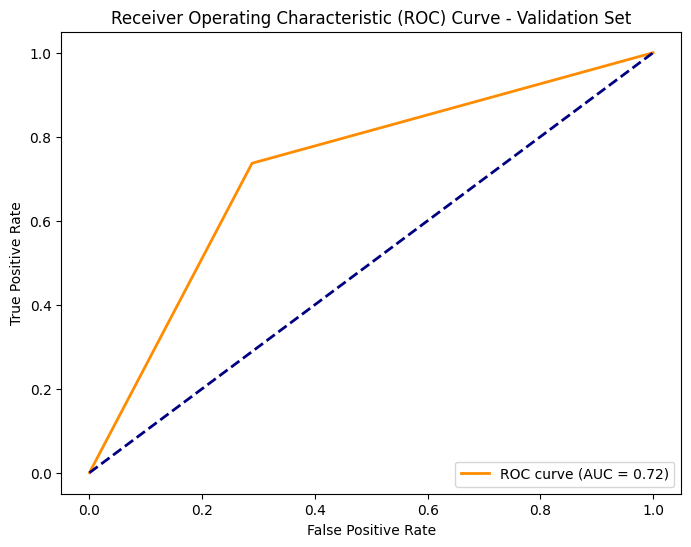

AUC for Validation Set: 0.7241902834008098


In [ ]:
# Predict probabilities for each class on the validation set
y_val_proba = classifier.predict_proba(X_val)[:, 1]

# Calculate ROC curve and AUC for the binary classification
fpr, tpr, _ = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve for the binary classification
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set')
plt.legend(loc="lower right")
plt.show()

# Print AUC for the binary classification
print("AUC for Validation Set:", roc_auc)

Q. Based on the scores for training set and validation set, explain the performance of the above model in terms of bias and variance.<br>

Ans - The model shows possible signs of overfitting. While it performs perfectly on the training set with low(or nearly no) bias, the significant drop in accuracy on the validation set and variability in precision and recall across classes suggest high variance. The model is likely too complex and has learned noise in the training data, resulting in poor generalization to new, unseen data. To fix the issue of overfitting, we can reduce the model's complexity, such as through hyperparameter tuning or using a simpler model. If we look into numbers more specifically, in the training set, the prediction of accuracy, precision, and recall was 1 individually, indicating the model fits the training set very well with no bias. While in the validation set, precision (0.651) and recall (0.737) indicate that the model performs reasonably well, but there is room for improvement. Also, a significant drop in performance on the validation set compared to the training set often indicates higher variance.

### Random Forest


Decision Trees have low predictive power compared to other methods due to high variance. Random Forest increases prediction power at the expense of decreased interpretability.


From sklearn.ensemble use RandomForestClassifier to build a classification model with default parameters.

In [ ]:
## YUFEI

In [ ]:

from sklearn.ensemble import RandomForestClassifier
### Fit the classifier on the training data
# Please set random_state=30
### WRITE CODE HERE ###
ranfor = RandomForestClassifier(random_state=30).fit(X_train, y_train)


In [ ]:
### Make predictions on the training data
### WRITE CODE HERE ###

y_train_pred=ranfor.predict(X_train)


In [ ]:
### WRITE CODE HERE ###
# Calculate Precision
precision = precision_score(y_train, y_train_pred)

# Calculate Recall
recall = recall_score(y_train, y_train_pred)

# Calculate Accuracy
accuracy = accuracy_score(y_train, y_train_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)


Precision: 1.0
Recall: 1.0
Accuracy: 1.0


Print accuracy, precision and recall for the predictions made on the training data.

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [ ]:
### Make predictions on the validation data

### WRITE CODE HERE ###
y_pred=ranfor.predict(X_val)


Print accuracy, prediction and recall for the predictions made on the validation data.

In [ ]:
### WRITE CODE HERE ###
# Calculate Precision
precision = precision_score(y_val, y_pred)

# Calculate Recall
recall = recall_score(y_val, y_pred)

# Calculate Accuracy
accuracy = accuracy_score(y_val, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)


Precision: 0.75
Recall: 0.868421052631579
Accuracy: 0.8222222222222222


Plot ROC curve and obtain AUC for the validation predictions

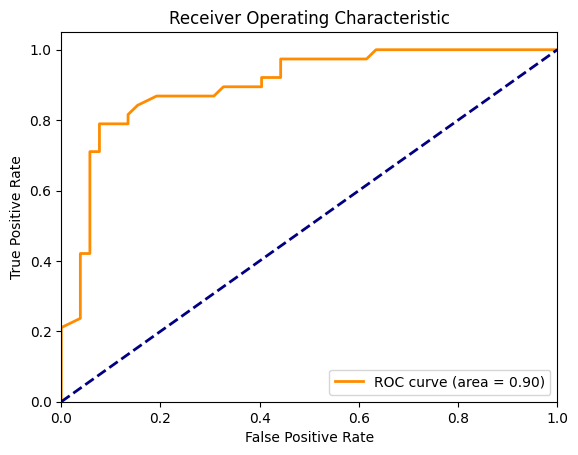

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.

### WRITE CODE HERE

from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics

import matplotlib.pyplot as plt


y_probs = ranfor.predict_proba(X_val)[:, 1]

# Compute ROC curve and ROC area
y_probs = ranfor.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Q. Based on the scores for training set and validation set, explain the performance of the above model in terms of bias and variance. Is the Random Forest model better or worse than the Decision Tree model? Explain why you think the performance may have improved or deteriorated.

Ans-
For the Random Forest model, we see an accuracy of 82.2%, indicating a relevantly low level of bias. And the AUC area of random forest method indicates that the model can make 90% valid classification. And the precision value is 75% and recall is 86.8%, which are high and balanced value. These values indicates a relevantly low variance level.

The Random Forest model is better than the Decision Tree model. Because it has a overall higher level of accuracy, precision, recall, and auc area compared to that of the Decision Tree model. And the model presents relevantly low level of bias and variance. To further improve the performance of the models, we could adjust the hyparameters of the models and minimize the noise of the dataset.

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data, which is separate from "fitting" or "training" the model.

There are aspects of some models that are user specified. For example, when using a random forest (which is basically an ensemble of decision trees), it is probably a good idea to choose the right number of underlying trees. Too many and the model might overfit, and too few and the model might not be able to properly learn the data. Parameters such as these are referred to as "hyperparameters" or "free parameters", as the values for these are determined by the user and not the algorithm.

A quick and efficient way to optimize hyperparameters is to perform Grid Search over different values of the parameters.

In [ ]:
## GEORGE

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# In the below dictionary, fill in the list of values that you want to try out for each parameter
# Refer to the descriptions in sklearn.ensemble.RandomForestClassifier's doc to understand what the parameters depict

param_grid = {
    'max_depth': [],
    'max_features': [],
    'min_samples_leaf': [],
    'min_samples_split': [],
    'n_estimators': []
}

In [ ]:
# In the below dictionary, fill in the list of values that you want to try out for each parameter
# Refer to the descriptions in sklearn.ensemble.RandomForestClassifier's doc to understand what the parameters depict

param_grid = {
    'max_depth': [1, 3, 5],
    'max_features': [1, 3, 5, 7],
    'min_samples_leaf': [1, 5, 9, 13],
    'min_samples_split': [2, 3, 5],
    'n_estimators': [10, 50, 100]
}

In [ ]:
rf = RandomForestClassifier(random_state=30)

In [ ]:
grid_search = GridSearchCV(estimator = rf, scoring='recall', param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
### Fit on the training data with all sets of parameters.
### WRITE CODE HERE ###

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score found by GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_


Fitting 3 folds for each of 432 candidates, totalling 1296 fits


Display the parameters of the best model.

In [ ]:
# Print the best parameters
### WRITE CODE HERE ###

print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
# Print the best score

print("Best Score:", best_score)

Best Score: 0.8282828282828283


In [ ]:
### Using the best model, do the following:
### Make predictions on the training set and display accuracy, precision and recall.
### Make predictions on the validation set and display accuracy, precision and recall.

### Using the best model, do the following:
### Make predictions on the training set and display accuracy, precision and recall.
### WRITE CODE HERE ###

best_model = grid_search.best_estimator_
y_train_pred_bt = best_model.predict(X_train)

from sklearn.metrics import precision_score, recall_score, accuracy_score

# Assuming y_train is the true labels and y_train_pred are the predictions from the model

# Calculate Precision
precision = precision_score(y_train, y_train_pred_bt)

# Calculate Recall
recall = recall_score(y_train, y_train_pred_bt)

# Calculate Accuracy
accuracy = accuracy_score(y_train, y_train_pred_bt)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)



Precision: 0.8645833333333334
Recall: 0.8383838383838383
Accuracy: 0.8599033816425121


In [ ]:
### Make predictions on the validation set and display accuracy, precision and recall.
### WRITE CODE HERE ###

y_val_pred_bt = best_model.predict(X_val)

from sklearn.metrics import precision_score, recall_score, accuracy_score

# Assuming y_val is the true labels and y_val_pred are the predictions from the model

# Calculate Precision
precision = precision_score(y_val, y_val_pred_bt)

# Calculate Recall
recall = recall_score(y_val, y_val_pred_bt)

# Calculate Accuracy
accuracy = accuracy_score(y_val, y_val_pred_bt)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.8095238095238095
Recall: 0.8947368421052632
Accuracy: 0.8666666666666667


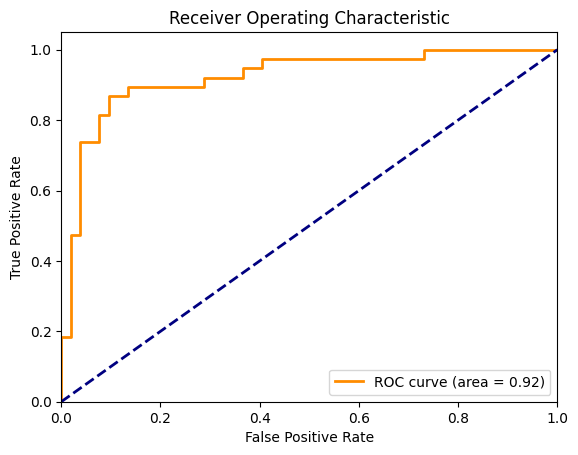

In [ ]:
# Plot the ROC curve on validation set by giving appropriate names for title and axes.

### WRITE CODE HERE

from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# Predict probabilities
y_probs = best_model.predict_proba(X_val)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_val, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Individual student contribution

Cecilia (UID:  306311909): ROC curve and Hyparameter Dataset 1<br>
George (UID: 005856460): Hyperparameter Dataset 2:<br>
Mishika (UID: 506310334):Dataset 1- Standardization, One-Hot Encoding of Categorical Variables and Logistic Regression and Overall consolidation of the assignment  <br>
Sophie (UID: 906310313): Decision Tree Dataset 2 <br>
Yufei (UID: 805307029): Hyparameter Dataset 1 & Random Forest <br>